## Fraud: A how-to guide

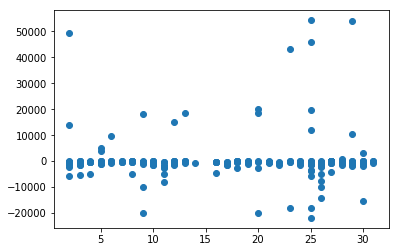

array([-629.01716394, -766.51716394, -816.51716394, -729.01716394,
       -666.51716394, -816.51716394])

In [30]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

df = pd.read_csv('anonymized.csv')

data = []
for _, row in df.iterrows():
    if re.match(r".*May.*", row['Date']):
        data.append([int(row['Date'][:2]), row['Amount']])

data = np.array(data)
plt.scatter(data[:,0], data[:,1])
plt.show()

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data)
kde.score_samples(X)

## Clustering survey data

In [9]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

print(people)

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

[3 1 3 0 2 0 1 0 0 0 1 1 0 0 0 2 0 1 0 1 0 2 0 2 0 0 0 2 1 1 0 0 2 0 2 2 0
 2 2 1 0 0 0 0 3 1 0 1 0 1 1 2 1 0 0 3 2 1 3 1 1 1 0 1 1 1 0 3 1 2 3 0 1 1
 1 0 0 0 1 0 1 3 1 0 2 2 0 3 3 1 2 2 3 0 1 0 0 2 0 2 0 0 2 0 0 2 3 0 3 0 2
 1 0 0 1 0 0 1 2 1 0 0 1 1 1 0 1 2 1 1 0 0 1 1 2 0 2 3 1 1 1 1 1 1 2 1 3 1
 0 0 0 3 0 1 3 3 0 0 1 1 2 3 0 0 1 2 0 1 3 0 0 0 0 0 1 2 1 0 3 0 1 0 0 0 1
 1 0 0 1 1 0 3 1 2 2 3 3 2 0 0 0 0 3 0 0 2 0 0 3 1 2 1 0 0 2 2 2 2 1 1 0 1
 2 2 0 1 1 0 3 3 3 1 2 3 0 0 0 2 3 2 2 1 3 0 2 1 1 1 0 0 1 3 0 1 0 1 3 1 1
 1 2 2 0 1 1 0 1 3 2 0 0 0 2 1 0 0 1 0 0 3 1 1 0 0 1 1 1 0 2 1 0 3 0 0 1 3
 0 1 1 0 3 0 3 0 0 0 0 1 0 0 1 0 1 0 2 2 2 1 0 0 1 0 0 3 3 2 1 0 1 3 0 0 0
 0 1 2 0 2 0 0 0 1 0 2 1 0 2 3 1 3 0 0 1 2 2 1 0 2 0 0 1 1 0 0 3 1 3 2 0 2
 1 1 2 0 0 2 1 1 1 2 2 1 1 1 0 0 0 0 1 1 0 0 0 2 0 2 1 0 1 0 0 0 1 0 1 0 0
 2 1 1 0 0 0 1 3 0 0 0 3 1 0 3 0 3 0 2 0 0 1 0 2 3 1 3 3 0 3 3 2 0 3 0 1 0
 3 0 0 0 3 3 0 3 3 0 3 0 3 0 2 2 3 0 2 2 1 1 3 0 1 0 0 2 0 1 2 2 2 0 1 2 1
 0 3 2 0 3 0 0 1 3 0 1 3 

In [18]:
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.

    # This is probably not the correct answer!
    people = np.random.rand(n_people, n_clusters)

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.
    for i in range(answers.shape[0]):
        biases = answers[i].mean()
    
    # This is probably not the correct answer!
#     biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)

20 4
20 4
20 4
20 4
20 4
20 4
20 4
20 4
20 4
20 4
0.45
[[0.37988021 0.16205819 0.40254536 0.05551623]
 [0.37791039 0.02163472 0.48098495 0.11946995]
 [0.23538648 0.14609078 0.4344281  0.18409465]
 ...
 [0.08211854 0.4692217  0.3798401  0.06881967]
 [0.24838622 0.26316713 0.27407766 0.21436898]
 [0.11630244 0.31685472 0.55618597 0.01065686]]
